# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.

- The approval process for the loans is multifaceted. Through this process, the bank tries to check the credit worthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases.

- There have been attempts by many banks to automate this process by using heuristics. But with the advent of data science and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases and more efficient. At the same time, one important thing to keep in mind is to make sure that the machine does not learn the biases that previously crept in because of the human approval process.

 - A bank's consumer credit department aims to simplify the decision making process for home equity lines of credit to be accepted. To do this, they will adopt the **Equal Credit Opportunity Act's** guidelines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on the data obtained via the existing loan underwriting process from recent applicants who have been given credit. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).

### **The objective:**
 
 - Analyze and build a classification model to predict clients who are likely to default on their loan and 
 - Identify important features to consider while approving a loan.
 - Give recommendations to the bank on the on a profile of the persons who are likely to default on their loan
 

### **The key questions:**

- What are the key questions that need to be answered?
- What were the average number of years at the job for the delinquent clients
- What were the top 3 Jobs of the delinquent clients
- What are the lengths of the top 5 delinquent lines of credit
- Which reason for the loan request, Home Improvement or Debt consolidation has the most delinquencies

### **The problem formulation**:

- What is it that we are trying to solve using data science?
- Using a classification model the bank should be able to predict which features or combination of features of a customer would likely default on their loan.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
!{sys.executable} -m pip install missingno

!{sys.executable} -m pip install plotnine

!{sys.executable} -m pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
 
import missingno as msno

import seaborn as sns
sns.set_theme()

from plotnine import ggplot, aes, geom_point, geom_bar, labs, theme, theme_bw, element_text, element_blank, scale_fill_manual

# For training and testing the data
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn import metrics

import scipy.stats as stats

from sklearn.linear_model import LogisticRegression

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

## Load the data
- Create a copy to use for data manipulation

In [3]:
# Load the data - original data set
client_data = pd.read_csv('hmeq.csv')

In [4]:
# create a copy of the data set to work with
df = client_data.copy()

## Data Overview

- Observations
- Sanity checks
- View the first and last five rows of the data

In [5]:
# look at the first rows of the data
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
# check the data last five rows
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [7]:
df.shape

(5960, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations**
- There are 5960 rows and 13 columns
- The data types for the features are:
- 2 objects <code>REASON</code> and <code>JOB</code> - Will create dummy variables for these two
- 2 integers <code>BAD</code> and <code>LOAN</code> - These have all 5960 values.  No NULL values 
- 9 floats for the remaining features

**Missing Values**
- Determine the number of missing values for each feature

In [9]:
# Count the number of missing values in each column
missing_values_count = df.isnull().sum()

# Print the number of missing values in each column
print("Number of Missing Values in Each Column:")
print(missing_values_count)

Number of Missing Values in Each Column:
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


- Percentage of missing values

In [10]:
# Find the percentage of missing values in each column
percent_missing = (missing_values_count/5960)*100

#print the percentage of missing values in each column
print("Percent of Missing Values in Each Column:")
print(percent_missing)

Percent of Missing Values in Each Column:
BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


**Observations**
- <code>DEBTINC</code> has the highest percent of missing values with 21%
- All other features have <= 11.8% missing values

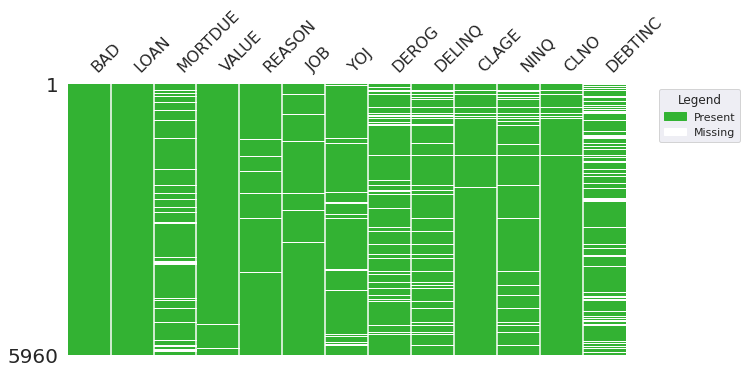

In [11]:
#Visulaize the number of missing values in each row
# Visualize missing values using missingno with custom colors
# Visualize missing values using missingno with custom colors
msno.matrix(df, figsize=(10, 5), color=(0.2, 0.7, 0.2), sparkline=False)

# Add a legend with custom color patches
present_patch = mpatches.Patch(color=(0.2, 0.7, 0.2), label='Present')
missing_patch = mpatches.Patch(color='white', label='Missing')
plt.legend(handles=[present_patch, missing_patch], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [12]:
# Convert object columns to a categorical (factor)
df['BAD'] = df['BAD'].astype('category')
df['REASON'] = df['REASON'].astype('category')
df['JOB'] = df['JOB'].astype('category')
# see the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


## Summary Statistics

In [13]:
df.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


**Observations from Summary Statistics**

- The average <code>LOAN</code> amount is 18607.97 .The minimum loan amount is 1100 and maximum amount is 89900.
- There is a large gap between the 75th percentile and maximum, perhaps indicating outliers.

- The average <code>MORTDUE</code> is 73760.81.  The minimum is 2063 and maximum amount is 3995500
- There is a large gap between the 75th percentile and maximum, perhaps indicating outliers

- The average <code>VALUE</code> is 101776.05.  The minimum is 8000 and maximum amount is 855909

- The average <code>YOJ</code> is 8.9.  The minimum is 0 and maximum time is 41
- There is a large gap between the 75th percentile and maximum, perhaps indicating outliers

- The average <code>DEROG</code> is 0.25.  The minimum is 0 and maximum number is 10

- The average <code>DELINQ</code> is 0.45.  The minimum is 0 and maximum number is 15

- The average <code>CLAGE</code> is 179.8.  The minimum is 0 and maximum time is 1168
- There is a large gap between the 75th percentile and maximum, perhaps indicating outliers (having a line of credit for 1168 months seems unlikely)

- The average <code>NINQ</code> is 1.19.  The minimum is 0 and maximum number is 17
- There is a large gap between the 75th percentile and maximum, perhaps indicating outliers

- The average <code>CLNO</code> is 21.3.  The minimum is 0 and maximum number is 71
- There is a large gap between the 75th percentile and maximum, perhaps indicating outliers

- The average <code>DEBTINC</code> is 33.78.  The minimum is 0.52 and maximum number is 203
- There is a large gap between the 75th percentile and maximum, perhaps indicating outliers

In [14]:
# Check summary for categorical data 
df.describe(include=['category'])

,BAD,REASON,JOB
count,5960,5708,5681
unique,2,2,6
top,0,DebtCon,Other
freq,4771,3928,2388


In [15]:
# Checking the count of unique values in each categorical column 
cols_cat= df.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts(normalize = True))
    print('*'*50)

Unique values in BAD are :
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
**************************************************
Unique values in REASON are :
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
**************************************************
Unique values in JOB are :
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
**************************************************


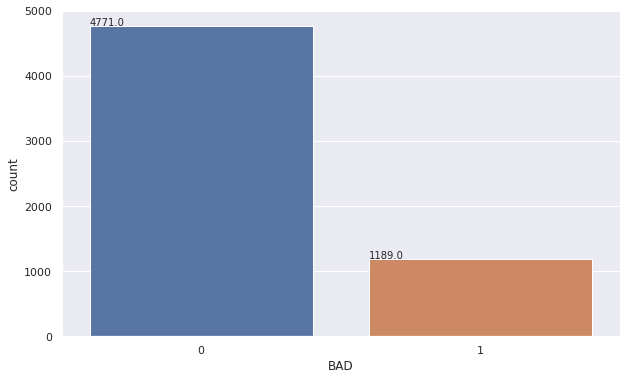

In [16]:
#create a bar chart to determine the number of customers which have defaulted on their loan (1)
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'BAD', data = df)

# Place the exact count on the top of the bar for each category using annotate
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

**Observations for Categorical Summary**
- <code>BAD</code> has 2 options 0 (repaid) or 1(default).
- 0 has the highest frequency with 4771 (80%) customers having repaid their loans and are not in default.

- <code>REASON</code> has two options DebtCon (Debt consolidation) or HomeImp (Home Improvement).
- DebtCon has the highest frequency with 3928 (69%).  
- However there are only 5708 responses therefore there are some missing values.

- <code>JOB</code> has 6 options with Other having the highest frequency with 2388 (42%).
- However there are only 5681 responses therefore there are some missing values.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


### Distributions and Outliers
#### Create count plots to identify the distribution of the data
#### Create box plots to determine if there are any outliers in the data.

LOAN
The skew is: 2.02


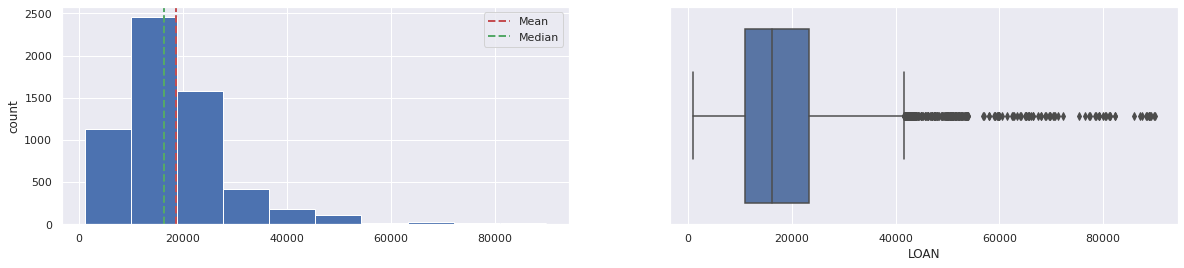

MORTDUE
The skew is: 1.81


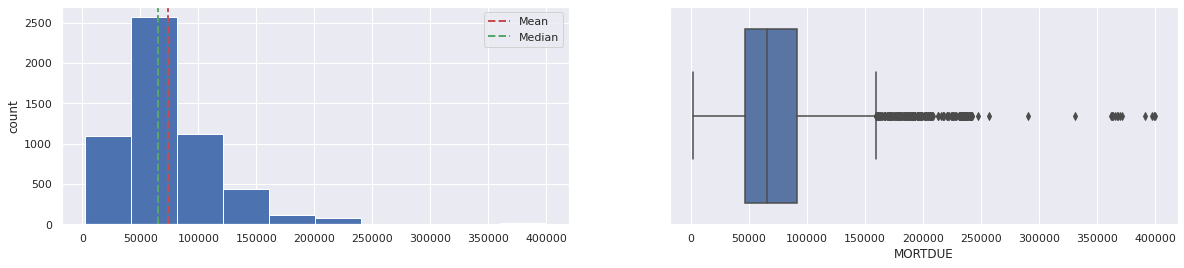

VALUE
The skew is: 3.05


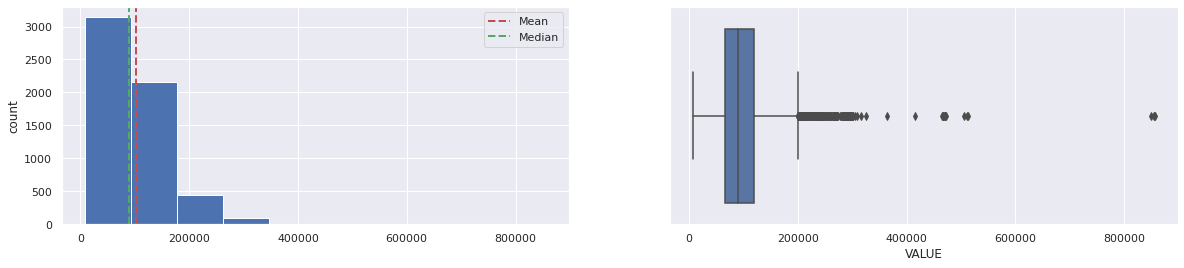

YOJ
The skew is: 0.99


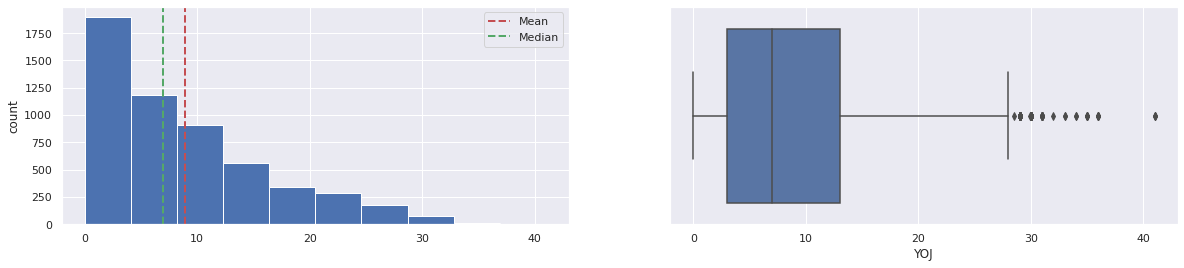

DEROG
The skew is: 5.32


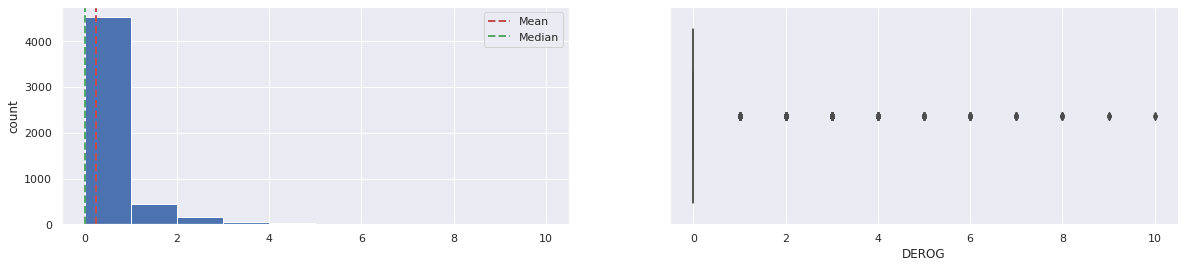

DELINQ
The skew is: 4.02


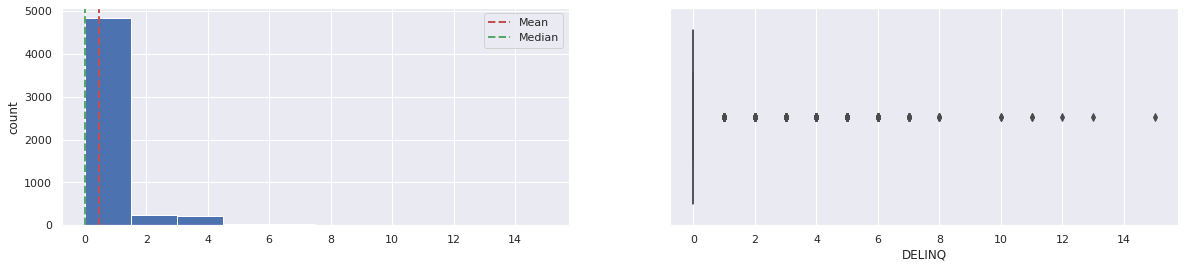

CLAGE
The skew is: 1.34


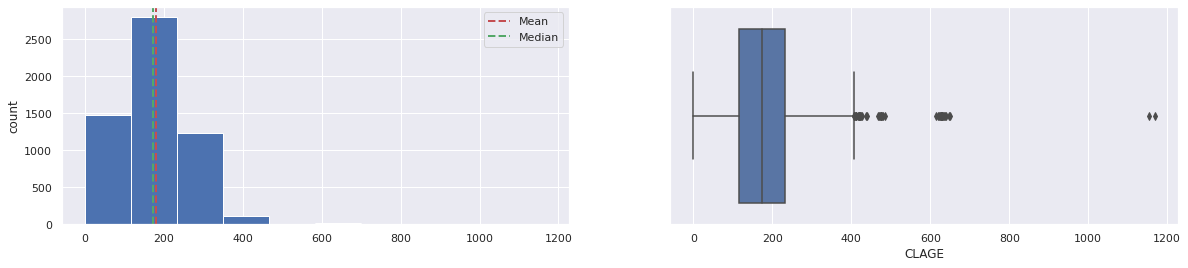

NINQ
The skew is: 2.62


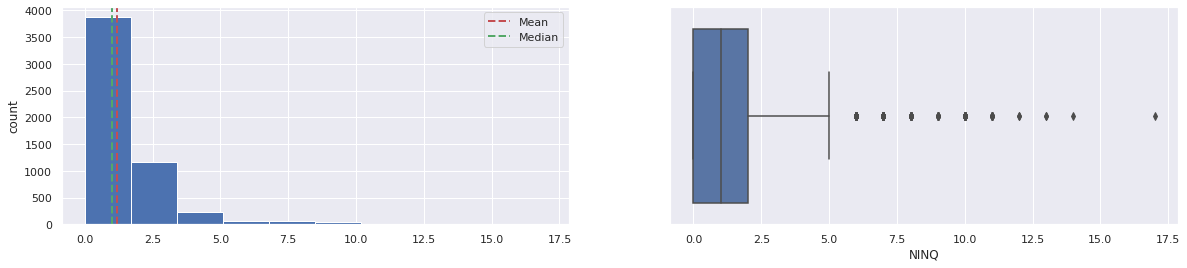

CLNO
The skew is: 0.78


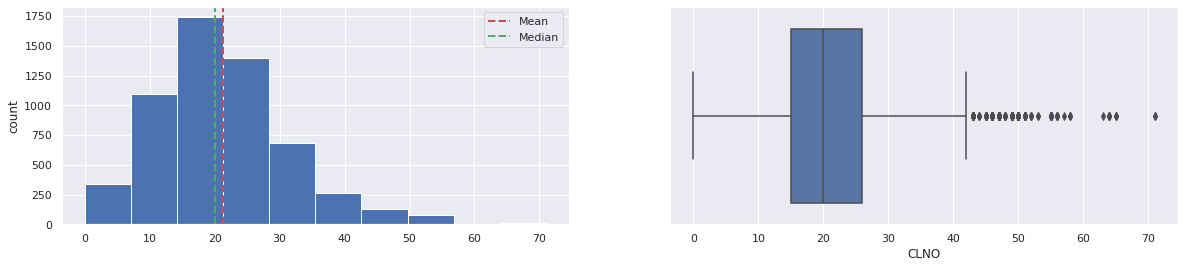

DEBTINC
The skew is: 2.85


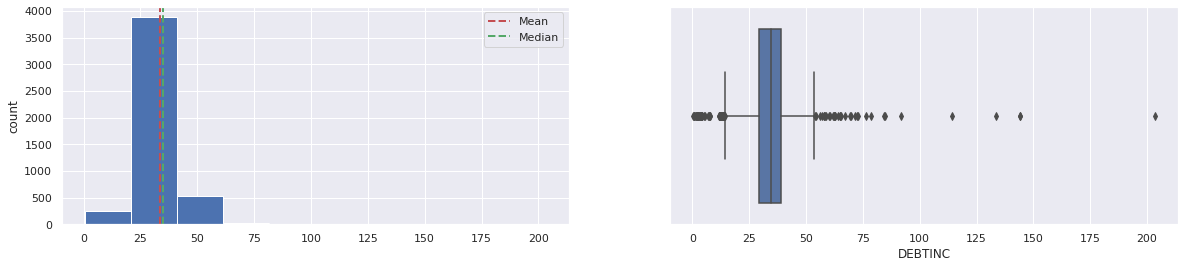

In [17]:
#create histograms and box plots to visualize data to identify the distribution and outliers

for col in ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']:
    print(col)
    
    print('The skew is:', round(df[col].skew(), 2))
    
    plt.figure(figsize=(20, 4))
    
    # histogram    
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=10)
    plt.ylabel('count')
    
    # Add mean and median to the histogram
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label='Median')
    plt.legend()
    
    # box plot    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
   
    plt.show()


**Observations**
- <code>LOAN</code> - Positive Skew (2.02) with a range from 0 to 90000 and there are outliers present on the box plot. 
- Due to the low number loans above the 75th% these should remain.  The bank is only going above that in a few cases.

- <code>MORTDUE</code> - Positive Skew (1.9) with a range from 0 to 275000 and there are outliers present on the box plot
- Considering the number of outliers outside of the 75th percentile, it is likely this is not an error.

- <code>VALUE</code> - Positive Skew (3.08) with a range from 0 to 300000 and there are outliers present on the box plot

- <code>YOJ</code> - Positive Skew (1.03) with a range from 0 to 40 and there are outliers present on the box plot
- Even though there are only a few outliers it follows the trend of the data and is likely not an outlier.

- <code>DEROG</code> - Positive Skew (5.67) with a range from 0 to 8 and there are outliers present on the box plot
- hard to say if these are outliers or just special cases.

- <code>DELINQ</code> - Positive Skew (4.23) with a range from 0 to 7.5 and there are outliers present on the box plot
- hard to say if these are outliers or just special cases.

- <code>CLAGE</code> - Positive Skew (1.38) with a range from 0 to 700 and there are outliers present on the box plot
- Given the spread of data points it is **highly likely that the 2 max outliers are errors.** Should remove them as to not contaminate the data.

- <code>NINQ</code> - Positive Skew (2.74) with a range from 0 to 12 and there are outliers present on the box plot.  
- Looks more like special cases, rather than outliers, as it follows the curve the data.

- <code>CLNO</code> - Positive Skew (2.02) with a range from 0 to 70 and there are outliers present on the box plot

- <code>DEBTINC</code> - Positive Skew (3.21) with a range from 0 to 75 and there are outliers present on the box plot.  IT is not likely that a person has a Debt to income ratio greater than 200. Last outlier is likely an error, should remove it.



**Univariate Analysis - Categorical Data**

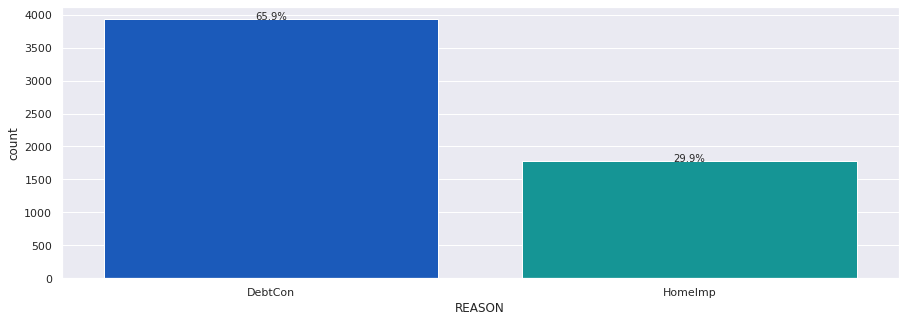

In [18]:
# Build barplot for REASON
plt.figure(figsize=(15, 5))
ax = sns.countplot(df["REASON"], palette='winter')

# Function to add percentage on top of each bar
def perc_on_bar(ax, data):
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

perc_on_bar(ax, df["REASON"])

plt.show()


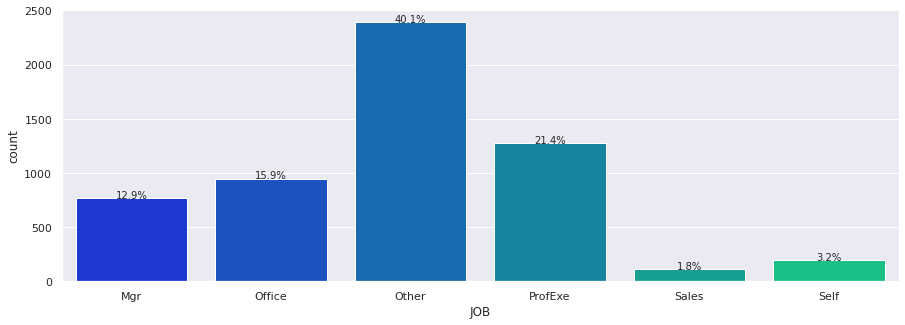

In [19]:
# Build barplot for JOB
plt.figure(figsize=(15, 5))
ax = sns.countplot(df["JOB"], palette='winter')

# Function to add percentage on top of each bar
def perc_on_bar(ax, data):
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

perc_on_bar(ax, df["JOB"])

plt.show()


**Major Observations**
- There are two features that may have errors based on the outliers <code>CLAGE</code> and <code>DEBTINC</code>

### **Bivariate Analysis**

**BAD vs LOAN**

<Axes: xlabel='BAD', ylabel='LOAN'>

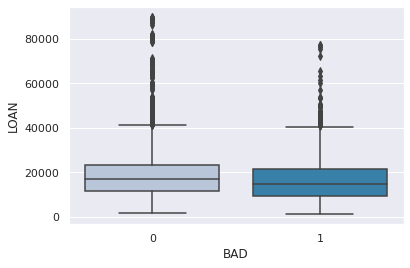

In [20]:
sns.boxplot(df["BAD"],df['LOAN'],palette="PuBu")

**Observations**
- Loan amount **does not** seem to have a great effect on defaults.

**BAD vs. MORTDUE**

<Axes: xlabel='BAD', ylabel='MORTDUE'>

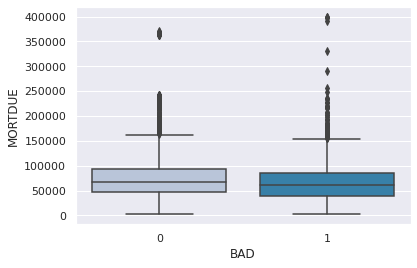

In [21]:
sns.boxplot(df["BAD"],df['MORTDUE'],palette="PuBu")

**Observations**
- Amount due on existing mortgage **does not** seem to have a great impact on defaults.

**BAD vs. VALUE**

<Axes: xlabel='BAD', ylabel='VALUE'>

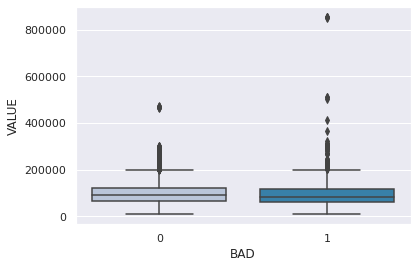

In [22]:
sns.boxplot(df["BAD"],df['VALUE'],palette="PuBu")

**Observations**
- Value of existing mortgage **does not** seem to have a great impact on defaults.

**BAD vs. DEBTINC**

<Axes: xlabel='BAD', ylabel='DEBTINC'>

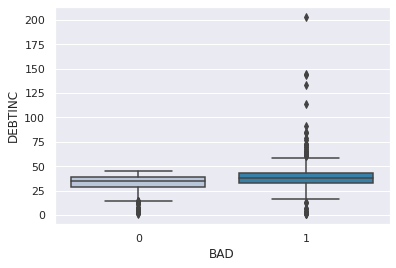

In [23]:
sns.boxplot(df["BAD"],df['DEBTINC'],palette="PuBu")

**Observations**
- Greater debt to income ratio **does** seem to result in more defaults

**Continuous Variables**

**VALUE and DEROG**

<Axes: xlabel='VALUE', ylabel='DEROG'>

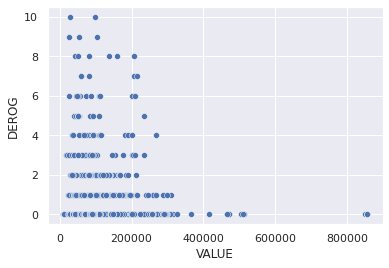

In [24]:
sns.scatterplot(df["VALUE"],df['DEROG'],palette="PuBu")

- The larger the loan the lower number of derogatory records.

**VALUE and DELINQ**

<Axes: xlabel='VALUE', ylabel='DELINQ'>

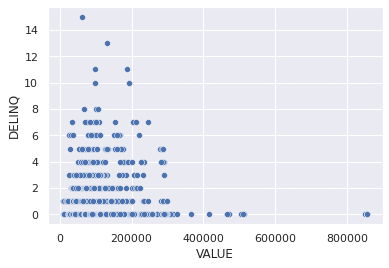

In [25]:
sns.scatterplot(df["VALUE"],df['DELINQ'],palette="PuBu")

- The larger the value of the loan the lower number of delinquent records

**Bivariate Analysis: BAD vs Categorical Variables**

The stacked bar graph allows you to look at numerical values across two categorical variables.

In [26]:
# Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

**Plot stacked bar plot for for LOAN and JOBS**

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


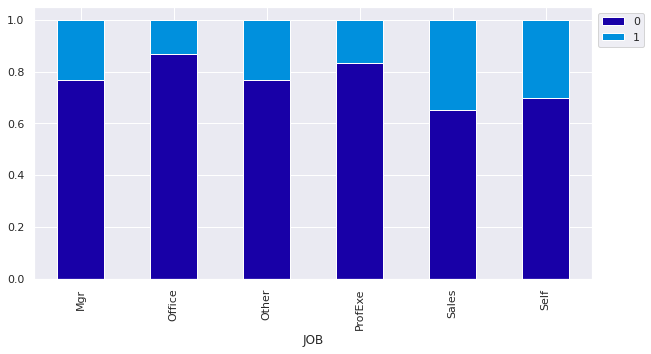

In [27]:
# Plot stacked bar plot for LOAN and JOB
stacked_plot(df['JOB'])

**observations**
- Sales employees and Self employed have the highest instances of defaulting on their loan.

**Plot stacked bar plot for for LOAN and DEROG**

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


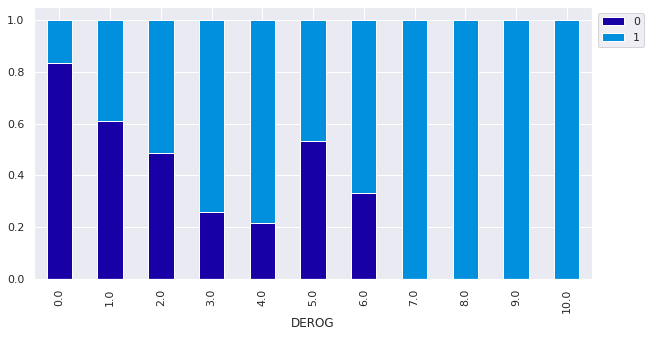

In [28]:
# Plot stacked bar plot for LOAN and DEROG
stacked_plot(df['DEROG'])

**Observations**
- Customers with >=7 derogatory reports all defaulted on their loans
- The number of customers who defaulted on their loans increases with the number of derogatory reports

**Plot stacked bar plot for for LOAN and DELINQ**

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


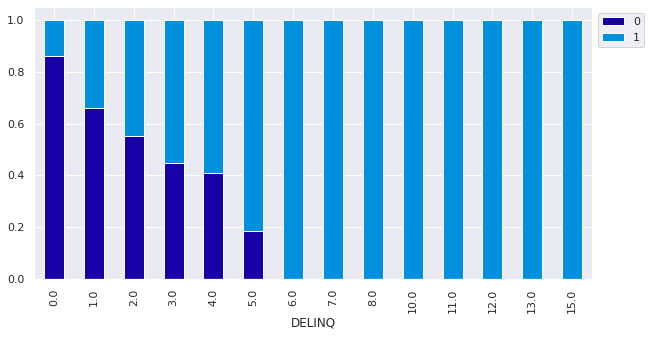

In [29]:
stacked_plot(df['DELINQ'])

**Observations**
- The customers with >= 6 Delinquencies all defaulted on their loan

### **Multivariate Analysis**

**Correlation heat map**

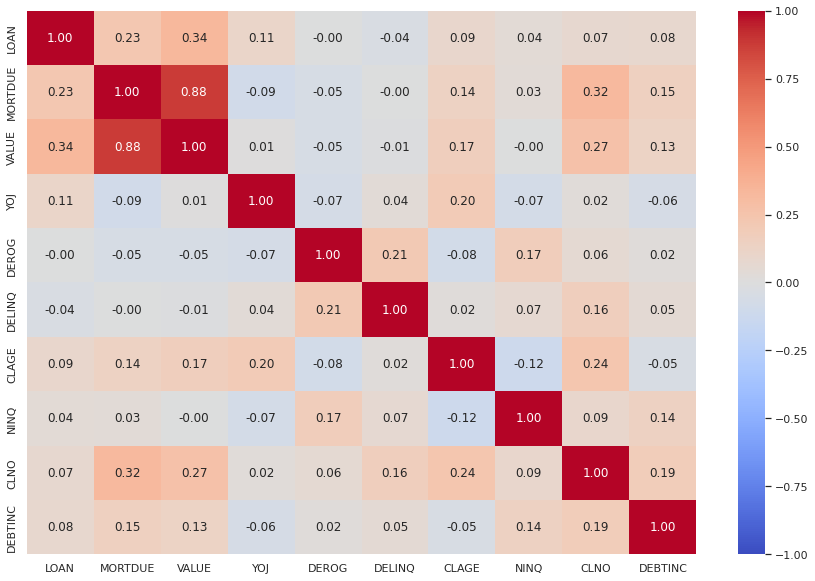

In [30]:
# Separating numerical variables
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = df[numerical_col].corr()

# plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        annot=True, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Observations**
- The mortgage due and the value of the house are very closely related with 0.88

**Pair Plot**

## Treating Outliers

### Identifying outliers
- defined a function <code>find_outliers_IQR</code> which takes in a dataframe as an input and returns a dataframe as an output.  The returned data frame contains the outliers as numerical values and others as NaN
- identified the outliers: lower limit < q1 - 1.5 * IQR and higher limit > q3 + 1.5 * IQR

**Replace the outliers**
1. if outlier is < Lower Whisker then replace outlier with Lower Whisker
2. if outlier is > Upper Whisker then replace outlier with Upper Whisker

In [31]:
# make a copy of the original data
df_raw = df.copy()


In [32]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the LOAN
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['LOAN'])

# Replace the outliers with the whisker values
df_raw['LOAN'] = df_raw['LOAN'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'LOAN' column
num_outliers = ((df_raw['LOAN'] == Lower_Whisker) | (df_raw['LOAN'] == Upper_Whisker)).sum()

print('Number of outliers in LOAN column:', num_outliers)

print('LOAN min outlier value: ' + str(outliers.min()))

print('LOAN max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in LOAN column: 260
LOAN min outlier value: 41700
LOAN max outlier value: 89900


5704    41700
5705    41700
5706    41700
5707    41700
5708    41800
        ...  
5955    88900
5956    89000
5957    89200
5958    89800
5959    89900
Name: LOAN, Length: 256, dtype: int64

In [33]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the LOAN
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['LOAN'])

# Replace the outliers with the whisker values
df_raw['MORTDUE'] = df_raw['MORTDUE'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'MORTDUE' column
num_outliers = ((df_raw['MORTDUE'] == Lower_Whisker) | (df_raw['MORTDUE'] == Upper_Whisker)).sum()

print('Number of outliers in MORTDUE column:', num_outliers)

print('MORTDUE min outlier value: ' + str(outliers.min()))

print('MORTDUE max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in MORTDUE column: 4355
MORTDUE min outlier value: nan
MORTDUE max outlier value: nan


Series([], Name: LOAN, dtype: int64)

In [34]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the VALUE
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['VALUE'])

# Replace the outliers with the whisker values
df_raw['VALUE'] = df_raw['VALUE'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'VALUE' column
num_outliers = ((df_raw['VALUE'] == Lower_Whisker) | (df_raw['VALUE'] == Upper_Whisker)).sum()

print('Number of outliers in VALUE column:', num_outliers)

print('VALUE min outlier value: ' + str(outliers.min()))

print('VALUE max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in VALUE column: 320
VALUE min outlier value: 200459.0
VALUE max outlier value: 855909.0


140     245300.0
194     251962.0
291     250155.0
345     245730.0
414     208910.0
          ...   
5927    288512.0
5928    292380.0
5929    289430.0
5933    215000.0
5934    224630.0
Name: VALUE, Length: 320, dtype: float64

In [35]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the YOJ
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['YOJ'])

# Replace the outliers with the whisker values
df_raw['YOJ'] = df_raw['YOJ'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'YOJ' column
num_outliers = ((df_raw['YOJ'] == Lower_Whisker) | (df_raw['YOJ'] == Upper_Whisker)).sum()

print('Number of outliers in YOJ column:', num_outliers)

print('YOJ min outlier value: ' + str(outliers.min()))

print('YOJ max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in YOJ column: 126
YOJ min outlier value: 28.5
YOJ max outlier value: 41.0


263     31.0
407     29.0
408     29.0
412     29.0
416     31.0
        ... 
5687    30.0
5723    30.0
5741    30.0
5747    31.0
5900    33.0
Name: YOJ, Length: 91, dtype: float64

In [36]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the DEROG
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['DEROG'])

# Replace the outliers with the whisker values
df_raw['DEROG'] = df_raw['DEROG'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'DEROG' column
num_outliers = ((df_raw['DEROG'] == Lower_Whisker) | (df_raw['DEROG'] == Upper_Whisker)).sum()

print('Number of outliers in DEROG column:', num_outliers)

print('DEROG min outlier value: ' + str(outliers.min()))

print('DEROG max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in DEROG column: 5252
DEROG min outlier value: 1.0
DEROG max outlier value: 10.0


6       3.0
16      2.0
21      1.0
28      1.0
31      2.0
       ... 
5867    2.0
5877    1.0
5879    2.0
5881    2.0
5933    1.0
Name: DEROG, Length: 725, dtype: float64

In [37]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the DELINQ
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['DELINQ'])

# Replace the outliers with the whisker values
df_raw['DELINQ'] = df_raw['DELINQ'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'DELINQ' column
num_outliers = ((df_raw['DELINQ'] == Lower_Whisker) | (df_raw['DELINQ'] == Upper_Whisker)).sum()

print('Number of outliers in DELINQ column:', num_outliers)

print('DELINQ min outlier value: ' + str(outliers.min()))

print('DELINQ max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in DELINQ column: 5380
DELINQ min outlier value: 1.0
DELINQ max outlier value: 15.0


1       2.0
6       2.0
8       2.0
11      1.0
14      1.0
       ... 
5939    1.0
5940    1.0
5941    1.0
5947    1.0
5954    1.0
Name: DELINQ, Length: 1201, dtype: float64

In [38]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the CLAGE
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['CLAGE'])

# Replace the outliers with the whisker values
df_raw['CLAGE'] = df_raw['CLAGE'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'CLAGE' column
num_outliers = ((df_raw['CLAGE'] == Lower_Whisker) | (df_raw['CLAGE'] == Upper_Whisker)).sum()

print('Number of outliers in CLAGE column:', num_outliers)

print('CLAGE min outlier value: ' + str(outliers.min()))

print('CLAGE max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in CLAGE column: 47
CLAGE min outlier value: 407.26116688
CLAGE max outlier value: 1168.2335609


202      417.633333
379      419.375154
411      475.800000
423      423.209624
469      421.541928
540      411.952051
712      419.272965
786      420.098164
909      411.753081
1166     419.033333
1205     421.362872
1470     440.421254
1797     427.923591
1848     436.751780
2010     407.261167
3097    1154.633333
3679    1168.233561
3787     630.033333
3856     632.103186
3868     618.735890
3928     634.461893
3976     407.585624
3980     412.014873
4040     626.297094
4059     623.456209
4098     627.702390
4143     626.771393
4153     615.133373
4238     638.275361
4262     628.158062
4264     639.058172
4357     622.355768
4390     628.981948
4402     627.662080
4417     629.095766
4431     468.866667
4470     649.747104
4535     408.187646
4536     648.328493
4538     412.020547
4656     471.887527
4670     473.813986
4682     474.027074
4931     485.945358
4990     480.356014
5044     476.728281
5060     468.178122
Name: CLAGE, dtype: float64

In [39]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the NINQ
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['NINQ'])

# Replace the outliers with the whisker values
df_raw['NINQ'] = df_raw['NINQ'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'NINQ' column
num_outliers = ((df_raw['NINQ'] == Lower_Whisker) | (df_raw['NINQ'] == Upper_Whisker)).sum()

print('Number of outliers in NINQ column:', num_outliers)

print('NINQ min outlier value: ' + str(outliers.min()))

print('NINQ max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in NINQ column: 252
NINQ min outlier value: 6.0
NINQ max outlier value: 17.0


44      14.0
175     10.0
212     10.0
273     10.0
283      9.0
        ... 
5876     7.0
5879     7.0
5881     6.0
5930     9.0
5931     9.0
Name: NINQ, Length: 177, dtype: float64

In [40]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the CLNO
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['CLNO'])

# Replace the outliers with the whisker values
df_raw['CLNO'] = df_raw['CLNO'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'NINQ' column
num_outliers = ((df_raw['CLNO'] == Lower_Whisker) | (df_raw['CLNO'] == Upper_Whisker)).sum()

print('Number of outliers in CLNO column:', num_outliers)

print('CLNO min outlier value: ' + str(outliers.min()))

print('CLNO max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in CLNO column: 219
CLNO min outlier value: 43.0
CLNO max outlier value: 71.0


31      45.0
202     50.0
316     47.0
340     47.0
360     47.0
        ... 
5617    64.0
5663    52.0
5773    46.0
5783    48.0
5833    47.0
Name: CLNO, Length: 219, dtype: float64

In [41]:
# Define the function to identify outliers
def find_outliers_IQR(df_raw):
    Q1 = df_raw.quantile(0.25)
    Q3 = df_raw.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    outliers = df_raw[((df_raw < Lower_Whisker) | (df_raw > Upper_Whisker))]
    return outliers, Lower_Whisker, Upper_Whisker

# Identifying the outliers for the DEBTINC
outliers, Lower_Whisker, Upper_Whisker = find_outliers_IQR(df_raw['DEBTINC'])

# Replace the outliers with the whisker values
df_raw['DEBTINC'] = df_raw['DEBTINC'].clip(lower=Lower_Whisker, upper=Upper_Whisker)

# Count the number of outliers in the 'DEBTINC' column
num_outliers = ((df_raw['DEBTINC'] == Lower_Whisker) | (df_raw['DEBTINC'] == Upper_Whisker)).sum()

print('Number of outliers in DEBTINC column:', num_outliers)

print('DEBTINC min outlier value: ' + str(outliers.min()))

print('DEBTINC max outlier value: ' + str(outliers.max()))

outliers

Number of outliers in DEBTINC column: 94
DEBTINC min outlier value: 0.5244992154
DEBTINC max outlier value: 203.31214869


17        3.711312
57        0.524499
118      11.652739
216      72.670433
220      12.043671
           ...    
5731     13.417822
5732     14.042012
5734     13.312356
5826      3.342570
5912    144.189001
Name: DEBTINC, Length: 94, dtype: float64

**Checking that outliers have been removed**

In [42]:
# Function that will create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

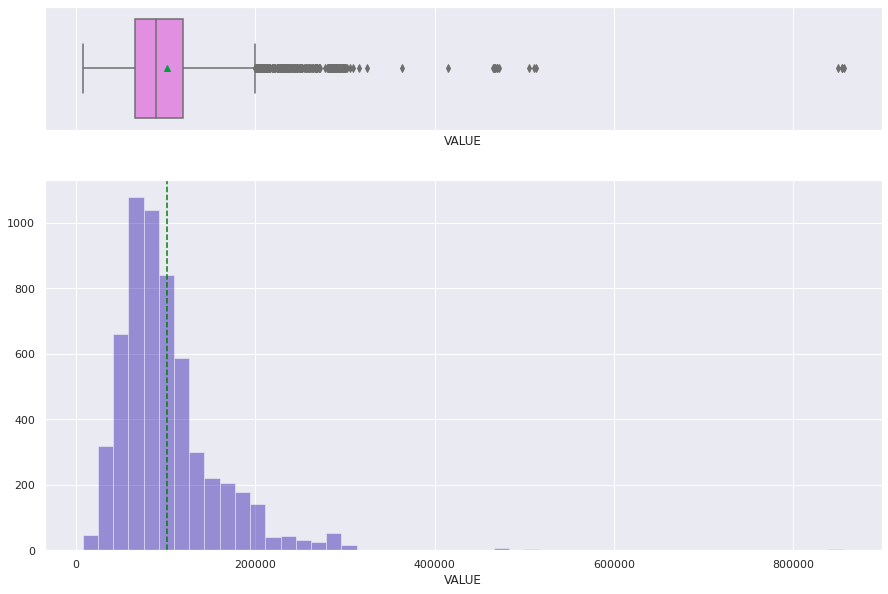

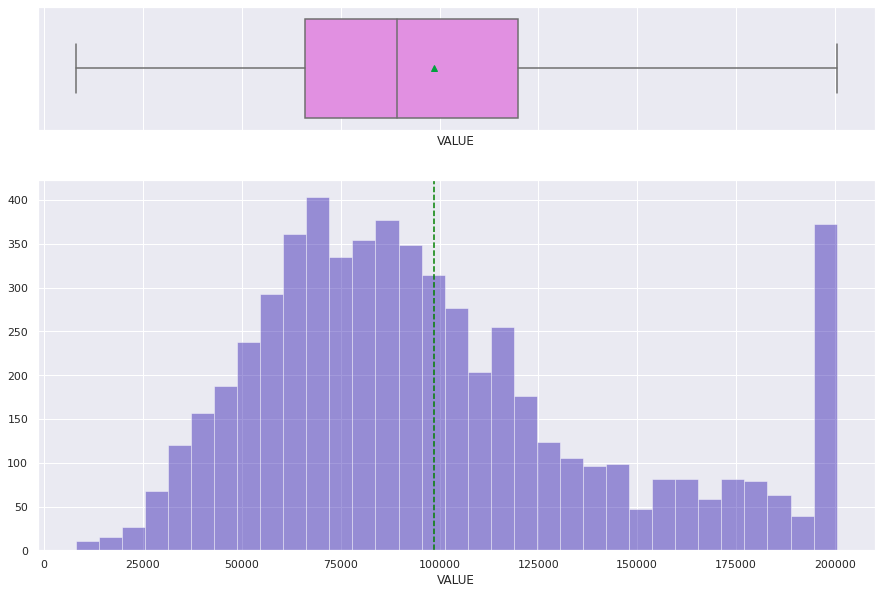

In [43]:
histogram_boxplot(df['VALUE'])
histogram_boxplot(df_raw['VALUE'])

## Treating Missing Values

Adding new columns in the dataset for each column which has missing values

In [44]:
# Will look at each row to first determine the number of missing values in each row.  
# create a column to give the number of missing values in the row.
# Create a column to say 'keep' if number of missing values os <7 and 'del' if >=7 values 


# Create a column to count the number of missing/null values in each row
df_raw['num_null'] = df_raw.isnull().sum(axis=1)

# Create a column to label rows as 'has_null' if num_null >= 1, otherwise 'comp' for complete data
df_raw['label'] = df_raw['num_null'].apply(lambda x: 'has_null' if x >= 1 else 'comp')

In [45]:
# look at top 5 rows of the data frame with the additional columns
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,num_null,label
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,1,has_null
1,1,1300,41600.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,NaN,1,has_null
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,1,has_null
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,has_null
4,0,1700,41600.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,1,has_null


In [46]:
# Count the number of 'del' in the 'label' column
num_del = (df_raw['label'] == 'has_null').sum()

# Print the number of 'del' in the 'label' column
print("Number of rows with missing values are:", num_del)

Number of rows with missing values are: 2596


**Actions Taken**
- Counted the number of missing/Null values in each row
- Created a column <code>num_null</code> to determine the number of missing/Null values in the row
- Created a column <code>label</code> to say 'comp' or "has_null'.  
- There are 3364 rows which were complete. There are 2596 rows which contain missing data.

**2596 rows which have missing values**
- There are too many rows that have missing data to delete them all.
- Will replace the missing numerical data with the median of the column. and the category with mode of the column.

In [47]:
# Find columns of data type category
df_obj = df_raw.select_dtypes(include=['category']).columns

# Replace missing values in category columns with the mode of the column
for col in df_obj:
    mode_value = df_raw[col].mode()[0]  # Extract the mode value
    df_raw[col] = df_raw[col].fillna(mode_value)  # Fill NaN with mode value


Replace the missing values in the numerical columns with the mean of the column

In [48]:
# Find columns of data type int64 and float64
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns

# Replace missing values in numeric columns with the average (median) of the column
for col in numeric_cols:
    df_raw[col] = df_raw[col].fillna(df_raw[col].median())

In [49]:
# recehck the number of missing values
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   BAD       5960 non-null   category
 1   LOAN      5960 non-null   int64   
 2   MORTDUE   5960 non-null   float64 
 3   VALUE     5960 non-null   float64 
 4   REASON    5960 non-null   category
 5   JOB       5960 non-null   category
 6   YOJ       5960 non-null   float64 
 7   DEROG     5960 non-null   float64 
 8   DELINQ    5960 non-null   float64 
 9   CLAGE     5960 non-null   float64 
 10  NINQ      5960 non-null   float64 
 11  CLNO      5960 non-null   float64 
 12  DEBTINC   5960 non-null   float64 
 13  num_null  5960 non-null   int64   
 14  label     5960 non-null   object  
dtypes: category(3), float64(9), int64(2), object(1)
memory usage: 576.8+ KB


In [50]:
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,num_null,label
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,1,has_null
1,1,1300,41600.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262,1,has_null
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,1,has_null
3,1,1500,41600.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,11,has_null
4,0,1700,41600.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,1,has_null


In [51]:
# Drop the 'num_null' and 'label' columns from df_raw
df_raw = df_raw.drop(['num_null', 'label'], axis=1)


In [52]:
# check the columns have been dropped
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,41600.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,41600.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,41600.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


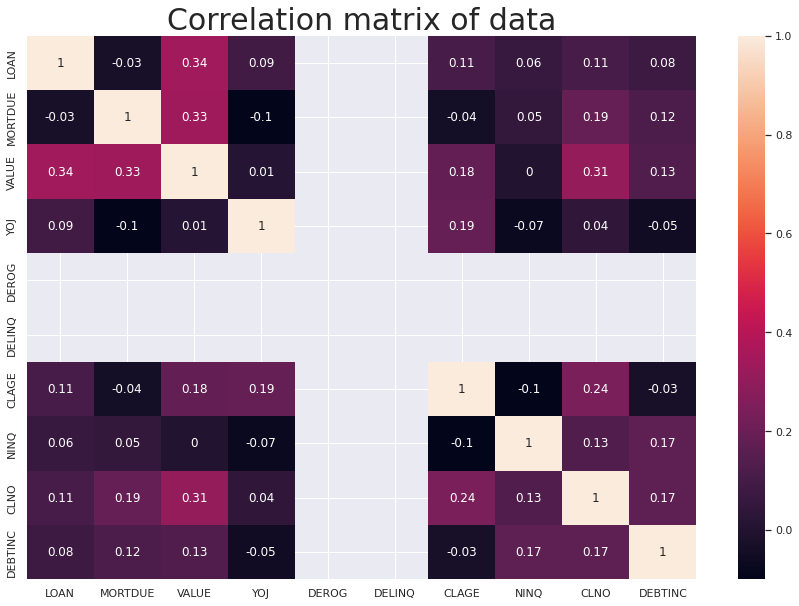

In [53]:
# check for multicollinearity between variables
# Select numeric columns
numeric_df = df_raw.select_dtypes(include=['number'])

# Correlation matrix (no grouping)
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr().round(2), annot=True)
plt.title('Correlation matrix of data', fontsize=30)
plt.show()


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

- Borrowers who **defaulted** have more **delinquent credit lines and major derogatory reports** than those who did not.
- Borrowers who repay their loans are credible to the bank, hence have older credit lines, 
- Borrowers who repay their loans have more recent credit inquiries, and generally have more credit lines in total than default customers.
- Borrowers who repay their loans have significantly higher debt-income ratio as well as loan request amount
- **Multicollinearity** - or co-dependence of variables - can significantly reduce the precision of estimated beta coefficients, as a result weakening the statistical significance of regression model. This is a phenomenon we wish to avoid in our final model. However after repairing the outliers and replacing the missing / Null values this does not occur.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

## Data Preparation

### **Separating the target variable from other variables**

In [54]:
#clean data set for LG
df_lg = df_raw.copy()

# make a new copy of the clean data
df_clean = df_raw.copy()

In [55]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df_clean.drop(columns = 'BAD') #make a copy called X which is a dataframe with "BAD" removed

# Create y(dependent varibale)
Y = df_clean['BAD'] #Y is a series (column) containing the "BAD" label data

# Create dummy variables for the categorical variables
X = pd.get_dummies(X, drop_first = True)

#pd.get_dummies => working on X dataframe converts all categorical variables into binary 1/0 yes/no columns.

### **Splitting the data into 70% train and 30% test set**

In [56]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## Shape 
- Check the shape of the trainng and test sets of data after manipulation

In [57]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 16)
Shape of the test set:  (1788, 16)
Percentage of classes in the training set:
BAD
0    0.804171
1    0.195829
Name: proportion, dtype: float64
Percentage of classes in the test set:
BAD
0    0.791946
1    0.208054
Name: proportion, dtype: float64


### Logistic Regression

In [58]:
#Split the data into training and testing
# 70/30 split

# All rows where 'BAD' column is 1
input_ones = df_lg[df_lg['BAD'] == 1] 
# All rows where 'BAD' column is 0
input_zeros = df_lg[df_lg['BAD'] == 0]  

# For repeatability of sample
np.random.seed(100)  

input_ones_training_rows = np.random.choice(input_ones.index, int(0.7 * len(input_ones)), replace=False)
input_zeros_training_rows = np.random.choice(input_zeros.index, int(0.7 * len(input_zeros)), replace=False)

# Pick as many 0's and 1's
training_ones = input_ones.loc[input_ones_training_rows]
training_zeros = input_zeros.loc[input_zeros_training_rows]

# Concatenate 1's and 0's
trainingData = pd.concat([training_ones, training_zeros])

# Create test data
test_ones = input_ones.drop(input_ones_training_rows)
test_zeros = input_zeros.drop(input_zeros_training_rows)

# Concatenate 1's and 0's
testData = pd.concat([test_ones, test_zeros])


In [59]:
#check for imbalance 
bad_counts = trainingData['BAD'].value_counts()

print(bad_counts)

BAD
0    3339
1     832
Name: count, dtype: int64


In [60]:
# check class distrubution
class_distribution = trainingData['BAD'].value_counts(normalize=True)

print(class_distribution)

BAD
0    0.800527
1    0.199473
Name: proportion, dtype: float64


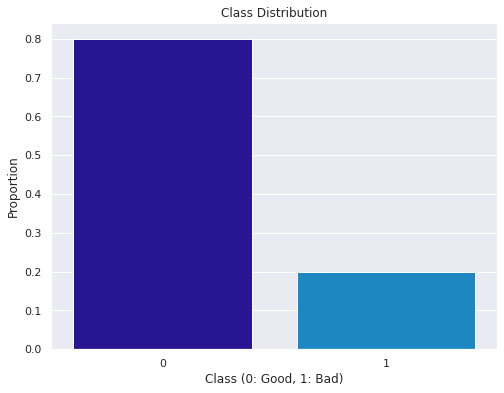

In [61]:
# Visualize class distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Class (0: Good, 1: Bad)')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

**Observation**
- There is a class bias
- To address class imbalance we need to use techniques like oversampling the minority class, undersampling the majority class, or using synthetic data generation techniques (e.g., SMOTE).

_Undersampling_
- This method works with majority class. It reduces the number of obervations from majority class to make the data set balanced. This method is best to use when the data set is huge and reducing the number of training samples helps to improve run time an storage troubles.

- 2 types: Random and Informative

_Oversampling_
- This method works with minority class. It tries to balance dataset by increasing the size of rare samples. It is used when the quantity of data is insufficient. New rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique).

- 2 types: Random and Informative

**Resampling Training Set **
- Will use a decision tree to determine which method is best 

Decision Tree often perform well on imbalanced datasets. The splitting rules that look at the class variable used in the creation of the trees, can force both classed to be addressed.

## **Model Evaluation Criterion**

Model is attempting to find those that will default(1) on their loan, which will be our True Positive(TP), and therefore non-defaulters(0) will be our True Negative(TN)

Model can make wrong predictions as:

1. Predicting a applicant will not default on a loan but, in reality, the applicant would default this is a major loss in profit for the BANK.
2. Predicting a applicant will default on a loan but, in reality, the applicant would have paid it off results in the bank loosing profit from the interest of that potential customer.

**Which case is more important?**

Predicting a applicant will not default on a loan but, in reality, the applicant would default this is a major loss in profit for the BANK.

**How to reduce the losses?**

The bank would want **recall** to be maximized. The greater the recall score, higher the chances of minimizing False Negative.
In this case the **false negative** is predicting an applicant **will not default(0)**, when the applicant would default(1)

That being said a high F1-Score is still preferable as that would result in more profits, as long as recall remains high.

**METRIC Function**

In [62]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
plt.show()

In [63]:
#Create a table to add the results of the model
results = pd.DataFrame(columns = ['Model_Name','Train_f1','Train_recall','Test_f1','Test_recall','Test_precision'])

results.head()

,Model_Name,Train_f1,Train_recall,Test_f1,Test_recall,Test_precision


### Decision Tree

- Encoding the data
- Creating Dummy variables
- Separating target variable from features 
- Create a fit the decision tree
- Make predictions on the test model and calculate the accuracy

Build Decision tree model

In [64]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8} to address data imbalance

d_tree_base = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

In [65]:
#fitting Decision tree model
d_tree_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



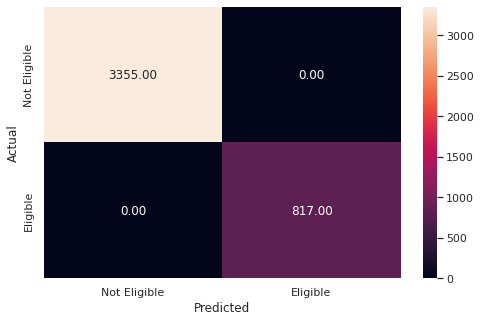

In [66]:
# Checking performance on the training data
y_pred_train1 = d_tree_base.predict(X_train)

metrics_score(y_train,y_pred_train1)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1416
           1       0.64      0.56      0.60       372

    accuracy                           0.84      1788
   macro avg       0.76      0.74      0.75      1788
weighted avg       0.84      0.84      0.84      1788



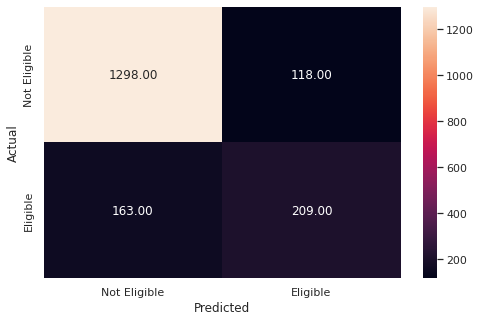

In [67]:
# Checking performance on the testing data
y_pred_test1 = d_tree_base.predict(X_test)

metrics_score(y_test,y_pred_test1)

Add data to results table

In [68]:
# Adding the results to the table

new_row = {'Model_Name': 'd_tree_base',
           'Train_f1': 100,
           'Train_recall': 100,
           'Test_f1': 60,
           'Test_recall': 56,
           'Test_precision': 64}

results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

# Print the updated DataFrame
print(results)



    Model_Name Train_f1 Train_recall Test_f1 Test_recall Test_precision
0  d_tree_base      100          100      60          56             64


**Observations**
- The base model is highly overfitted with the training data out performinning the testing data.
- The model has higher precision (64) to recall score (56).
- We would like the Recall Score to be higher than the Precision Score.
- Overall this is NOT a very good model.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Using GridSearchCV for Hyperparameter tuning on the model

In [69]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 6), #dept [2, 3, 4, 5]
              'criterion': ['gini', 'entropy'], #use both gini and entropy to measure split quality
              'min_samples_leaf': [5, 10, 20, 25] #minimum number of samples to be a leaf node
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5) #=> chooses the best hyperparameters to use

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       min_samples_leaf=25, random_state=7)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3355
           1       0.59      0.79      0.68       817

    accuracy                           0.85      4172
   macro avg       0.77      0.83      0.79      4172
weighted avg       0.88      0.85      0.86      4172



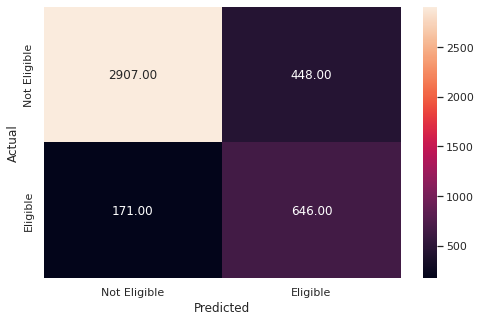

In [70]:
# Checking performance on the training data based on the tuned model
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train,y_pred_train2)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1416
           1       0.60      0.75      0.67       372

    accuracy                           0.85      1788
   macro avg       0.77      0.81      0.78      1788
weighted avg       0.86      0.85      0.85      1788



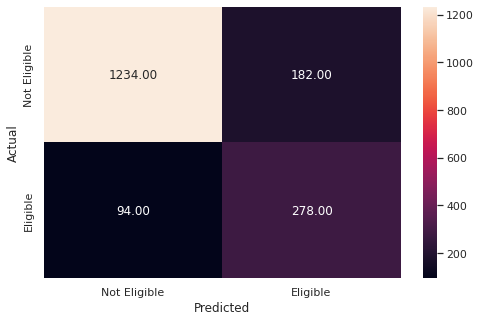

In [71]:
# Checking performance on the testing data based on the tuned model
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test,y_pred_test2)

In [72]:
# Adding the results to the table
new_row = {'Model_Name': 'd_tree_base',
           'Train_f1': 68,
           'Train_recall': 79,
           'Test_f1': 67,
           'Test_recall': 75,
           'Test_precision': 60}

results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

# Print the updated DataFrame
print(results)


    Model_Name Train_f1 Train_recall Test_f1 Test_recall Test_precision
0  d_tree_base      100          100      60          56             64
1  d_tree_base       68           79      67          75             60


**Observations**

- The tuned model is slightly overfitted with a training f1-score of 68 and a testing f1-score of 67.
- The model is performing higher on recall (75) over precision (60), which is what we need to minimize false negatives.
- However, the model is overall significantly less accurate. 
- Therefore we need to try and maintain these ratios while improving overall accuracy.

**Plotting the Decision Tree**

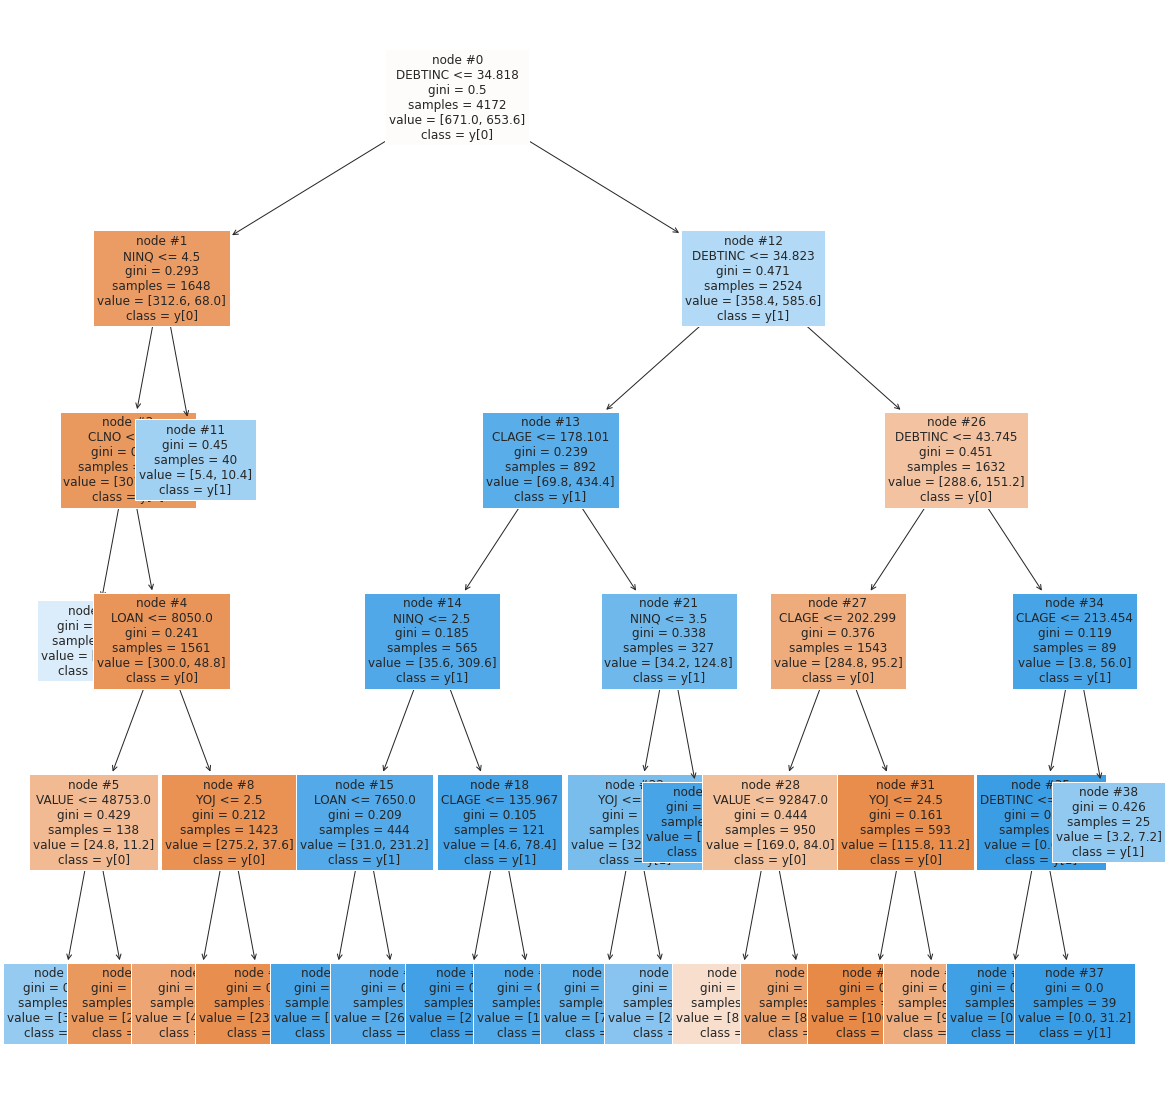

In [73]:
# Plot the decision  tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Observations**
- The first split is made on <code>DEBTINC</code> (Debt-to-income ratio) which means it has a high ability to predict defaulters
- Higher a <code>DEBTINC</code> indicates the applicant is more likely to default (As seen with our observations in EDA)

The next high priority splits are made on:
- <code>NINQ</code>(Number of recent credit inquiries) - Where a higher <code>NINQ</code> is more likely to default
- <code>CLAGE</code> (Age of the oldest credit line in months) - Where a lower <code>CLAGE</code> is more likely to **default**
- These where not apparent as strong indicators in EDA indicating that many indicators fall in the scope of <code>DEBTINC</code>, where <code>NINQ</code> and <code>CLAGE</code> have less overlap.

Plotting Feature Importance

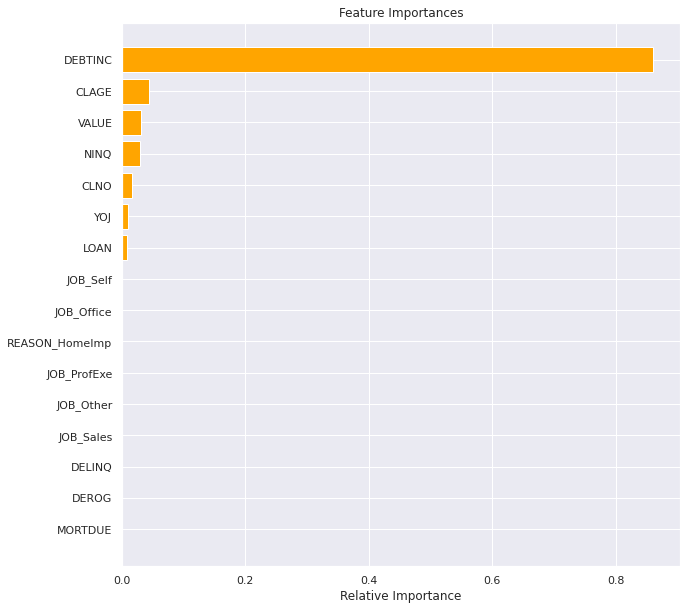

In [74]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'orange', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations**
- Highlights just how much of a dominant feature <code>DEBTINC</code> is compared to the others.
- <code>CLAGE</code> (age of oldest credit line in months), <code>VALUE</code> (Current value of the property) and <code>NINQ</code> (number of recent credit inquiries) are also a impactfull feature
- Where lower <code>VALUE</code> is more likely to default
- Where lower <code>CLAGE</code> is more likely to default
- Where higher <code>NINQ</code> is more likely to default
- <code>CLNO</code> (number of existing credit lines) , <code>YOJ</code> (years at present job) | <code>LOAN</code> (loan amount), are the only other features that have an impact.
- Surprising that <code>DEROG </code> (number of serious delinquency or late payments) and <code>DELINQ</code> (number of delinquent credit lines) did not show any impact given our EDA suggesting they might.
- Surprising that JOB_SALES and JOBS_SELF did not show any impact given our EDA suggesting they might.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [75]:
# Defining Random forest CLassifier
rf_base = RandomForestClassifier(random_state=7,criterion="entropy")

rf_base.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



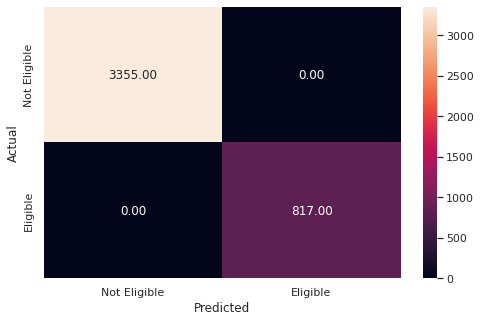

In [76]:
#Checking performance on the training data
y_pred_train3 = rf_base.predict(X_train)

metrics_score(y_train,y_pred_train3)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1416
           1       0.85      0.59      0.69       372

    accuracy                           0.89      1788
   macro avg       0.87      0.78      0.81      1788
weighted avg       0.89      0.89      0.88      1788



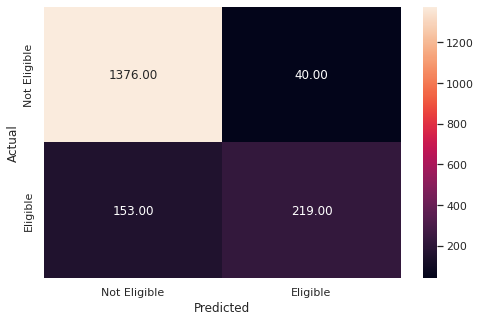

In [77]:
# Checking performance on the test data
y_pred_test3 = rf_base.predict(X_test)

metrics_score(y_test, y_pred_test3)

Add data to results table

In [78]:
# Adding the results to the table
new_row = {'Model_Name': 'random_forest',
           'Train_f1': 100,
           'Train_recall': 100,
           'Test_f1': 69,
           'Test_recall': 59,
           'Test_precision': 85}

results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

# Print the updated DataFrame
print(results)


      Model_Name Train_f1 Train_recall Test_f1 Test_recall Test_precision
0    d_tree_base      100          100      60          56             64
1    d_tree_base       68           79      67          75             60
2  random_forest      100          100      69          59             85


**Observations**
- The base random forest model is highly overfitted as expected
- It is naturally favoring precision, the oposite of what we want

Random Forest with class weights

In [79]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_weighted = RandomForestClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

# Fitting Random Forest model
rf_weighted.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



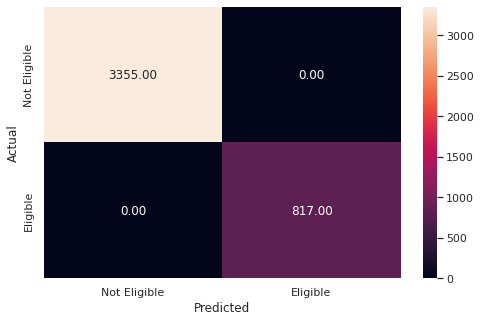

In [80]:
# Checking performance on the train data
y_pred_train4 = rf_weighted.predict(X_train)

metrics_score(y_train,y_pred_train4)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1416
           1       0.87      0.55      0.68       372

    accuracy                           0.89      1788
   macro avg       0.88      0.76      0.80      1788
weighted avg       0.89      0.89      0.88      1788



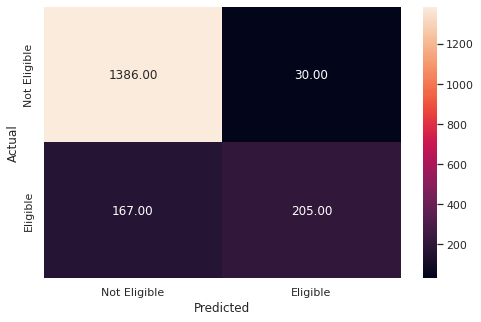

In [81]:
# Checking performance on the test data
y_pred_test4 = rf_weighted.predict(X_test)

metrics_score(y_test, y_pred_test4)

In [82]:
# Adding the results to the table
new_row = {'Model_Name': 'random_forest',
           'Train_f1': 100,
           'Train_recall': 100,
           'Test_f1': 68,
           'Test_recall': 55,
           'Test_precision': 87}

results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

# Print the updated DataFrame
print(results)

      Model_Name Train_f1 Train_recall Test_f1 Test_recall Test_precision
0    d_tree_base      100          100      60          56             64
1    d_tree_base       68           79      67          75             60
2  random_forest      100          100      69          59             85
3  random_forest      100          100      68          55             87


Weighting the random forest has dropped both the f1-score and recall scores

### **Random Forest Classifier Hyperparameter Tuning**

In [83]:
# Choose the type of classifier 
rf_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110],
    "max_depth": [5,6],
    "max_leaf_nodes": [8,10],
    "min_samples_split":[20],
    'criterion': ['gini'],
    "max_features": ['sqrt'],
    "class_weight": ["balanced",{0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5

grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       max_features='sqrt', max_leaf_nodes=10,
                       min_samples_split=20, random_state=7)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3355
           1       0.49      0.83      0.62       817

    accuracy                           0.80      4172
   macro avg       0.72      0.81      0.74      4172
weighted avg       0.86      0.80      0.82      4172



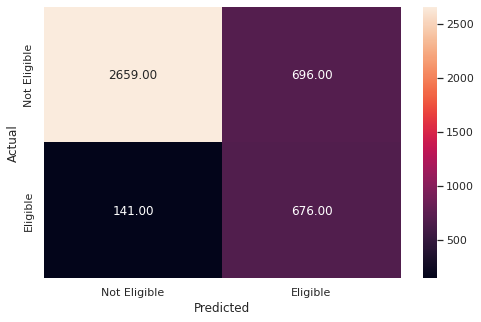

In [84]:
# Checking performance on the training data
y_pred_train5 = rf_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1416
           1       0.51      0.80      0.62       372

    accuracy                           0.80      1788
   macro avg       0.72      0.80      0.74      1788
weighted avg       0.85      0.80      0.81      1788



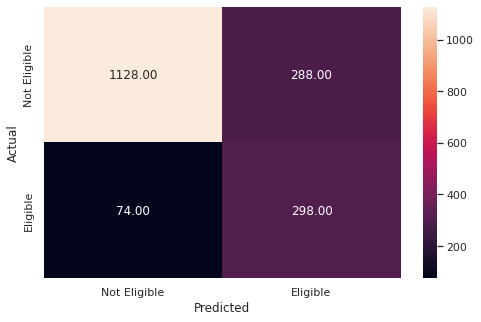

In [85]:
# Checking performace on test dataset
y_pred_test5 = rf_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

In [86]:
# Adding the results to the table
new_row = {'Model_Name': 'random_forest',
           'Train_f1': 62,
           'Train_recall': 83,
           'Test_f1': 62,
           'Test_recall': 80,
           'Test_precision': 51}

results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

# Print the updated DataFrame
print(results)
results.to_csv('results.csv')

      Model_Name Train_f1 Train_recall Test_f1 Test_recall Test_precision
0    d_tree_base      100          100      60          56             64
1    d_tree_base       68           79      67          75             60
2  random_forest      100          100      69          59             85
3  random_forest      100          100      68          55             87
4  random_forest       62           83      62          80             51


**Observations**

- The model is no longer overfitted with a equal training and testing f1-score of 62%.
- After multiple tunnings, we can conclude that the limited dataset makes it difficult to achieve a high accuracy
- However was able to tune the model to maximize recall and achieve a score of 80%.

Plot the Feature importance of the tuned Random Forest

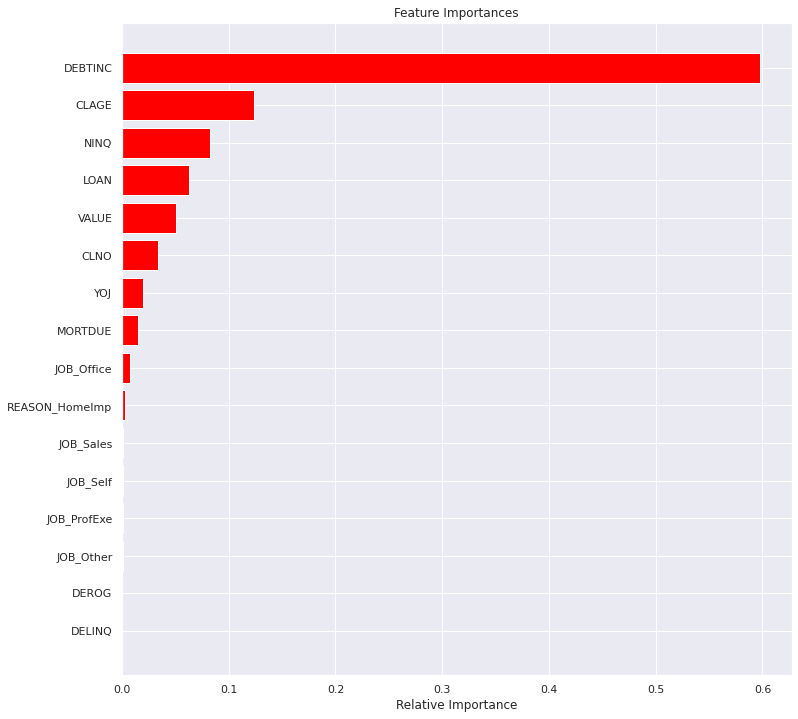

In [87]:
# importance of features in the random forest
importances = rf_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'red', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations**

- Random forest feature importance confirms many of the same features before.
- <code>DEBTINC</code> continues to be a dominant feature
- CLAGE, VALUE and NINQ continue to show relevant importance
- Loan has increased in importance where a smaller loan is more likely to default

# Conclusion and Recommendations

**Goal**

- Build a classification model to predict the customers who are likely to default on their loan

**Process**

- Maximize Recall (false negatives) as banks lose more money when a customer defaults on thier loans.  

- Maintain a high F1-Score (overall accuracy) as false positives would result in a loss of interest profit for the bank.

- Give recommendations to the bank on the important customer characteristics to consider while approving a loan.


**Conclusions**:

- As the models were tuned it was noticeable that the size (5960 data points) and composition (80/20 non-defaulters to defaulters) of the data was contributing to lower that ideal accuracy scores. 
- Therefore, the focus was only on maximizing **recall** even at the expense of overall accuracy. (The F1-score was not as high as preferred).

We built and tuned two models to predict if a customer would likely default on their loan. The results of the two models are:

**Tuned Decision Tree Model** - F1-score 67% and recall 75%
**Hyper Tuned Random Forest Model** - F1-score 62% and recall 80%

- The models are similarly balanced with 67% and 62% F1-scores.  
- However, since the goal is to maximize recall the Hyper Tuned Random Forest Model is recommended.
- The recall was higher at 80% with an accuracy of 80%.  
- This was achieved with a smaller data set and challenge of missing values.


**Major Features (Characteristics)**

The **top two features** identified by both the Decision Tree and the Random Forest Models

1. **Debt to income ratio (<code>DEBTINC</code>) is a very powerful tool in predicting defaulters.**
- The Debt to income ratio was the top feature identified in both models.
- The higher a customers debt-to-income ratio, the more likely the customer is to default.
- Therefore the bank should use the debt-to-income ratio as the first indicator when evaluating a customer.

2. **The credit age (<code>CLAGE</code>) of a customer is a feature to also review.**  
- The credit age was the second most important feature identified in both models.
- The amount of time someone has had credit the better the bank can gauge how well they will repay their loans. 

3. Additional features identified by both models
- <code>VALUE</code> and <code>NINQ</code> were both identified in the top 5 for both models, however, they were not ranked of the same importance.  
- <code>VALUE</code> was 3rd for the Decision Tree Model and 5th for the Random Forest Model.
- <code>NINQ</code> was 4th for the Decision Tree Model and 3rd for the Random Forest Model.

4. Feature identified by only one of the models in the top 5
- <code>CLNO</code> was 5th for the Decision Tree Model
- <code>LOAN</code> was 4th for the Random Forest Model

5. **Derogatory report (DEROG) and delinquency credit report (DELINQ) are also very important indicators** 
- Customers with DEROG >= 7 or DELINQ >= 6 all defauted on their loans.
- Both of these were identified during the EDA.

6. **Self-employed** customers have a higher probability of defaulting on their loans. 
- Identified during the EDA


**Overall**
- **More data** should be used to create a stronger model.

- **More care** should be taken when gathering and inputting  data.  
- There were possible errors and a large anount of missing data that could have assisted with improving the overall model.

- <code>DEBTINC</code> had the most missing values and had some possible inaccuracies in the data.  This feature was found to be the MOST important feature for predicting if a person would default.  The importance could be because of the correction of the missing values or it could be because it is important.  This needs to be evaluated further.  






**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?